In [1]:
%matplotlib inline
from parameters import *
from tau_ch_plot_study import *

# K Vshift and excluding Na

#### STEP-1 Parameters setup

In [2]:
VSHIFT = 5e-3 
tau = 1
f = 0
gmbar_Na = 120e-3
gmbar_K = 36e-3
K_n_params = get_k_n_params(VSHIFT=VSHIFT, tau=tau, f=f)

#### STEP-2 channel configuration setup

In [3]:
config_chan = {
'k':{'xpower':4,'ypower':None,
'm_params':K_n_params,'h_params':None,'gbar':gmbar_K, 'ek':-12e-3}}

simtime, simdt, plotdt = 0.1, 02.5e-6, 0.25e-3

#### STEP-3 Single Compartment neuron creation

In [4]:
comp = create_1comp_neuron('/model/neuron',1, config_chan)

#### STEP-4 Stimulus setup and current and voltage tabulation.

In [5]:
current_tab, vm_tab= setup_stimulation(comp)

#### STEP-5 MOOSE simulation

In [6]:
[moose.setClock(i, simdt) for i in range(10)]
moose.setClock(8, plotdt)
moose.reinit()
moose.start(simtime)
ts = np.linspace(0, simtime, len(vm_tab.vector))

#### STEP-6 Plot Action potentials VS time(s)

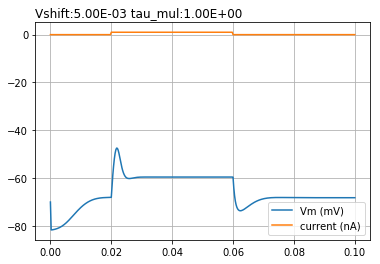

In [7]:
plt.plot(ts, vm_tab.vector * 1e3, label='Vm (mV)')
plt.plot(ts, current_tab.vector * 1e9, label='current (nA)')
plt.legend()
plt.title('Vshift:{:.2E} tau_mul:{:.2E}'.format(VSHIFT, tau) , loc='left')
plt.grid(True)

Alpha and Beta equations
- Channel NA -> Inactive and no Vshift added to parameters of  which are impacted by EREST_ACT.
- Channel K  -> Active and Vshift added to parameters which are impacted by EREST_ACT. 

In [8]:
from moose_nerp.graph.plot_channel import plot_gate_params

### window current tiny triangle which is steady state current.

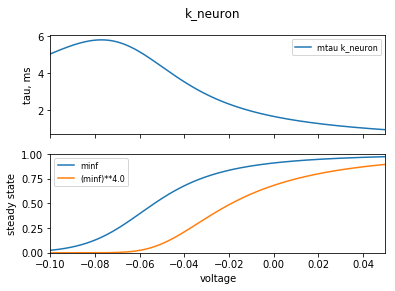

In [9]:
plot_gate_params(moose.element('/model[0]/k_neuron'), None)